# Análise Exploratória dos dados de casas em *Mumbai*

Essa análise exploratória de dados faz parte dos assuntos que estou aprendendo na cadeira de **Estatística Aplicada** da pós-graduação em Biometria e Estatística da Universidade Federal Rural de Pernambuco e ministrada pelo professor Dr. Lucian Bogdan Bejan.

Nessa análise exploratória serão usadas técnicas gráficas e de medidas para identificar padrões nos dados.

Na primeira etapa irei apenas analisar os dados de forma descritiva, observando os tipos dos dados, se há valores faltantes na base de dados. Em seguida, seguirei para análise gráfica onde usarei gráficos de barra, linha, histograma, gráfico de pareto, *boxplots*, etc. Por fim, irei gerar as medidas de posição, de dispersão e de assimetria.

## Dados

Os dados usados nesse pequeno projeto foram extraídos da plataforma *Kaggle* e pode ser acessada [aqui](https://www.kaggle.com/sameep98/housing-prices-in-mumbai). Esse *dataset* possui 6347 observações e 19 variáveis com os preços e características das casa ne cidade de Mumbai, na Índia.


## Instalação de bibliotecas

In [1]:
pip install stemgraphic

     |████████████████████████████████| 71kB 3.1MB/s 


## Importação de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import stemgraphic as stem
from scipy.stats import skew, trim_mean, iqr
plt.style.use('ggplot')
import statsmodels.api as sm

## Importando a base de dados

In [4]:
casas = pd.read_csv('Mumbai1.csv')

## Análise Exploratória de dados

A análise exploratória de dados é indispensável para um projeto de dados, pois permite identificar padrões nos dados que podem servir para um trabalho de modelagem mais eficiente, identificar variáveis que precisam de alguma transformação, seleção de variáveis, criação de novas variáveis, etc.

Primeiras observações da base de dados.

In [5]:
casas.head(10)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
5,5,17000000,2000,Kharghar,4,0,1,1,1,1,1,1,1,1,1,0,0,1,1
6,6,12500000,1550,Kharghar,3,0,0,1,1,1,1,0,0,1,1,0,1,0,0
7,7,10500000,1370,Sector-13 Kharghar,3,0,0,1,1,1,1,0,0,1,0,0,0,0,0
8,8,10500000,1356,Kharghar,3,0,1,1,1,1,1,0,1,1,0,0,0,1,1
9,9,15000000,1680,Kharghar,3,0,1,1,1,1,1,1,1,1,1,1,1,1,1


Últimas observações da base de dados.

In [6]:
casas.tail(10)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
6337,6337,10800000,1180,Mira Road East,2,1,1,1,1,0,1,1,1,1,1,1,0,1,0
6338,6338,2600000,530,Naigaon East,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
6339,6339,2465000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6340,6340,7200000,995,Mira Road East,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0
6341,6341,7000000,1020,Mira Road East,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6346,6346,2750000,700,Badlapur East,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1


## Tipos de Variáveis

Abaixo podemos ver as informações sobre a base de dados. Todas as variáveis são do tipos inteiro e apenas uma é do tipo *object*, porém é interessante dividirmos essas variáveis em cada um dos seus tipos.

**Variáveis Qualitativas** : *Location*, *New/Resale*, *Gymnasium*,*Lift Available*, *Car Parking*, *Maintenance Staff*, *24x7 Security*, *Children's Play Area*, *Clubhouse*, *Intercom*, *Landscaped Gardens*, *Indoor Games*, *Gas Connection*, *Jogging Track* e *Swimming Pool*.

**Variáveis Quantitativas** : *Price*, *Area* e *No. of Bedrooms*.


In [7]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

Apenas os tipos de dados.



In [75]:
casas.dtypes

Unnamed: 0               int64
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
New/Resale               int64
Gymnasium                int64
Lift Available           int64
Car Parking              int64
Maintenance Staff        int64
24x7 Security            int64
Children's Play Area     int64
Clubhouse                int64
Intercom                 int64
Landscaped Gardens       int64
Indoor Games             int64
Gas Connection           int64
Jogging Track            int64
Swimming Pool            int64
dtype: object

Não há valores faltantes na base de dados.

In [8]:
casas.isna().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

Valores únicos encontrados em cada uma das variáveis.

In [9]:
casas.nunique()

Unnamed: 0              6347
Price                    979
Area                    1140
Location                 413
No. of Bedrooms            7
New/Resale                 2
Gymnasium                  2
Lift Available             2
Car Parking                2
Maintenance Staff          2
24x7 Security              2
Children's Play Area       2
Clubhouse                  2
Intercom                   2
Landscaped Gardens         2
Indoor Games               2
Gas Connection             2
Jogging Track              2
Swimming Pool              2
dtype: int64

Tabela com as principais estatísticas descritivas.

In [10]:
casas.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6347.0,3.173000e+03,1.832365e+03,0.0,1586.5,3173.0,4759.5,6346.0
Price,6347.0,1.515401e+07,2.015943e+07,2000000.0,5300000.0,9500000.0,17500000.0,420000000.0
Area,6347.0,1.004327e+03,5.563757e+02,200.0,650.0,905.0,1182.0,8511.0
No. of Bedrooms,6347.0,1.910036e+00,8.633037e-01,1.0,1.0,2.0,2.0,7.0
New/Resale,6347.0,3.417363e-01,4.743290e-01,0.0,0.0,0.0,1.0,1.0
Gymnasium,6347.0,5.813770e-01,4.933722e-01,0.0,0.0,1.0,1.0,1.0
Lift Available,6347.0,8.014810e-01,3.989164e-01,0.0,1.0,1.0,1.0,1.0
Car Parking,6347.0,5.629431e-01,4.960614e-01,0.0,0.0,1.0,1.0,1.0
Maintenance Staff,6347.0,2.813928e-01,4.497141e-01,0.0,0.0,0.0,1.0,1.0
24x7 Security,6347.0,5.629431e-01,4.960614e-01,0.0,0.0,1.0,1.0,1.0


In [11]:
casas[['Price','Area','No. of Bedrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,6347.0,1.515401e+07,2.015943e+07,2000000.0,5300000.0,9500000.0,17500000.0,420000000.0
Area,6347.0,1.004327e+03,5.563757e+02,200.0,650.0,905.0,1182.0,8511.0
No. of Bedrooms,6347.0,1.910036e+00,8.633037e-01,1.0,1.0,2.0,2.0,7.0


## Análise gráfica

Abaixo irei aplicar as principais técnicas gráficas que foram apresentadas em aula com uma breve explicação sobre cada uma.

### Gráfico de Ramos-e-Folhas

Conforme **Bussab (2010)** "Um procedimento alternativo para resumir um conjunto de valores, com o objetivo de se obter uma idéia da forma de sua distribuição, é o ramo-e-folhas. Uma vantagem deste diagrama sobre o histograma é que não perdemos (ou perdemos pouca) informação sobre os dados em si." e ainda "Um ramo com muitas folhas significa maior incidência daquele ramo (realização)."

Conforme o gráfico de Ramos-e-Folhas a maioria dos dados da área das casas estão concentrado em valores entre 200 e 1800 de área.

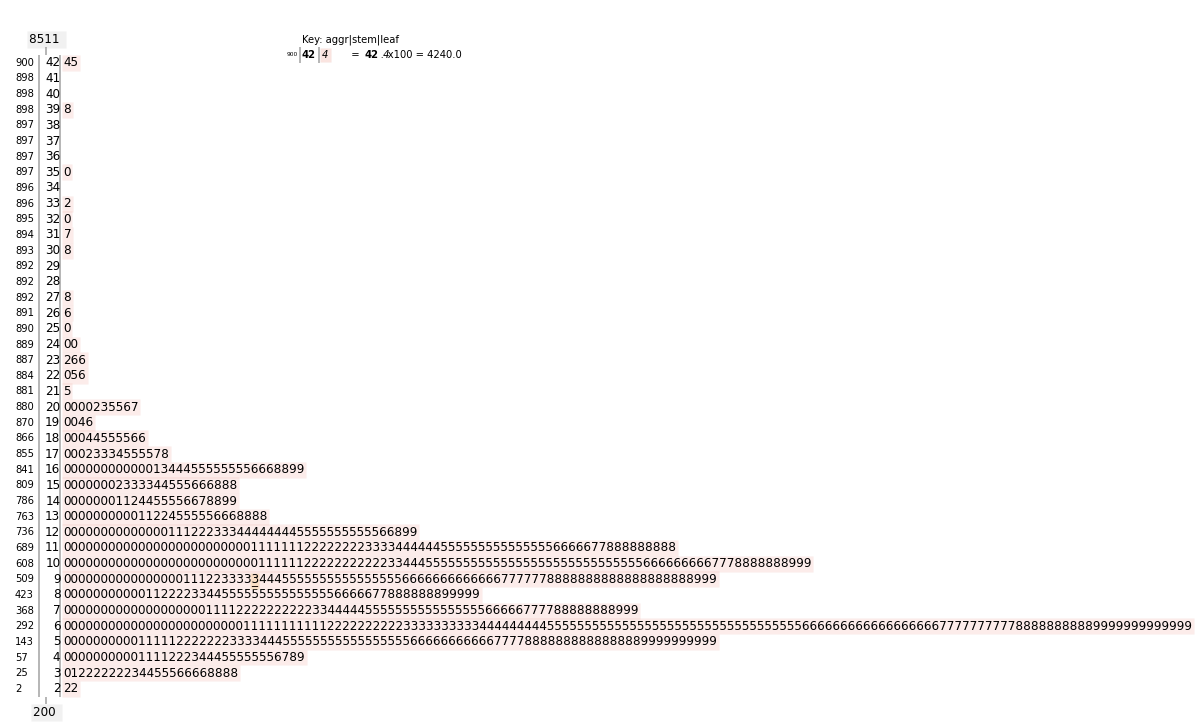

In [12]:
stem.stem_graphic(casas['Area'], scale = 100);

### Histograma

O histograma é um gráfico usado para representar variáveis contínuas. O histograma permite identificar de uma forma mais agradável onde os dados estão concentrados e como é o formato da distribuição desses dados.

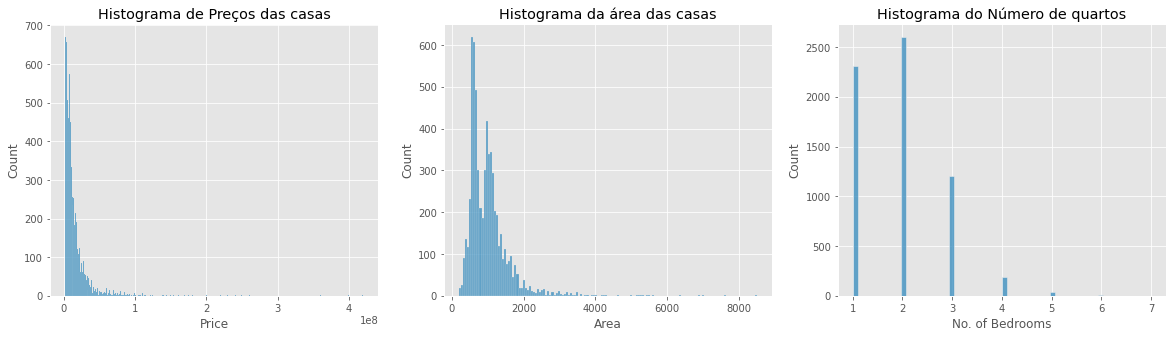

In [28]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].title.set_text('Histograma de Preços das casas')
ax[1].title.set_text('Histograma da área das casas')
ax[2].title.set_text('Histograma do Número de quartos')
sns.histplot(casas['Price'], ax=ax[0])
sns.histplot(casas['Area'], ax=ax[1])
sns.histplot(casas['No. of Bedrooms'], ax=ax[2]);

### *Boxplot* (ou gráfico de caixa)

O *boxplot* é usado para observar como os dados estão divididos port quartil. A linha do meio da caixa é a mediana (2º quartil) dos dados, uma medida de posição que divide os dados *ao meio*. O limite inferior da caixa é o 1º quartil e o limite superior é o 3º quartil; e, por fim, os pontos que aparecem são os valores extremos, também chamados de *outliers*.

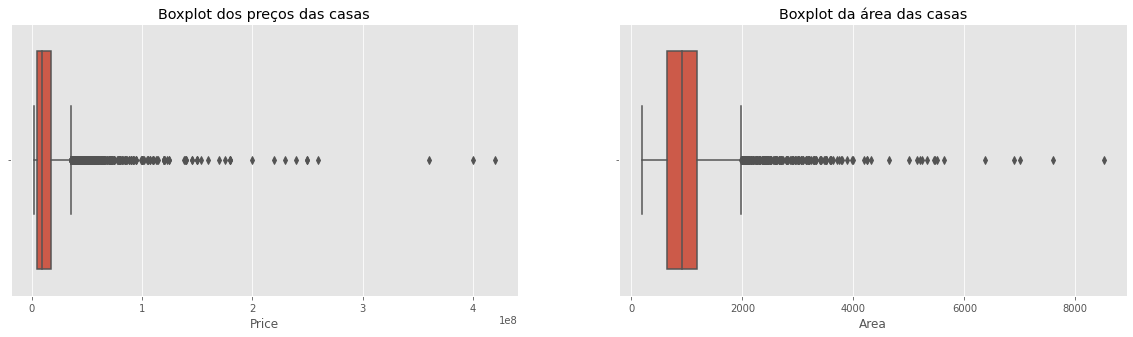

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('Boxplot dos preços das casas')
ax[1].title.set_text('Boxplot da área das casas')
sns.boxplot(x='Price', data=casas, ax=ax[0])
sns.boxplot(x='Area', data=casas, ax=ax[1]);

Esse gráfico também pode ser gerado de outra forma, conforme abaixo. Entretanto, por conta da escala dos dados serem diferentes fica inviável vizualizar os *outliers* da variável de área das casas, por esse motivo, os dados sofreram uma transformação logarítmica.

Agora podemos ver que os preços possuem muitos *outliers* acima do limite superior, já nos dados de área tanto acima do limite superior e abaixo do limite superior há muitos *outliers*.

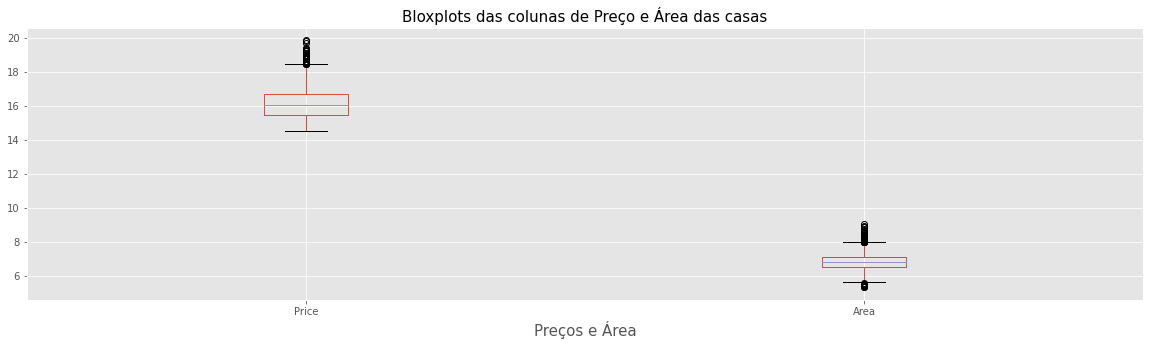

In [19]:
plt.figure(figsize=(20,5))
np.log(casas[['Price','Area']]).boxplot()
plt.title('Bloxplots das colunas de Preço e Área das casas',size=15)
plt.xlabel('Preços e Área',size=15)
plt.ylabel('')
plt.show()

### Gráfico de dispersão e gráfico de regressão

Abaixo temos dois gráficos diferentes: o *scatterplot* e o gráfico de linha.

No *Scatterplot* ou gráfico de dispersão podemos visualizar a relação entre duas variáveis. Aqui usei os dados de Área na eixo *x* e os dados de preço no eixo *y*, podendo assim perceber uma relação positiva entre essas variáveis; a medida que a área das casas aumenta os preços das casas também aumenta.

O segundo gráfico é, basicamente, o primeiro, mas com uma linha de regressão. Essa linha mostra a relação linear entre essas variáveis.

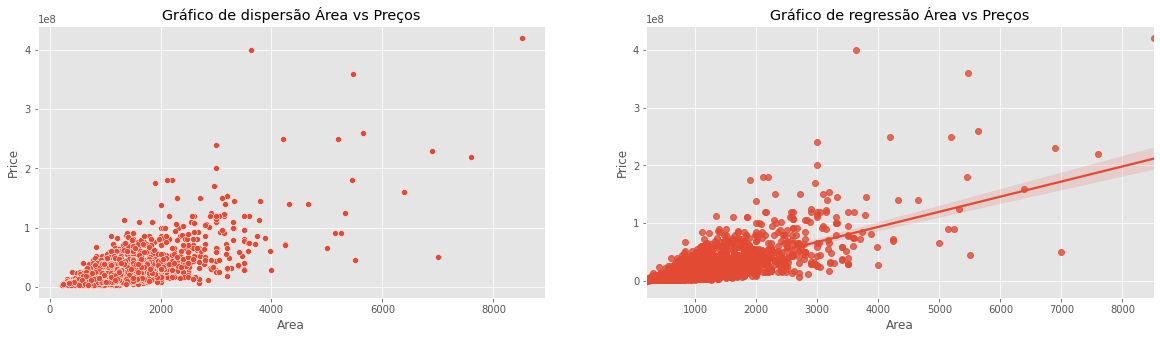

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('Gráfico de dispersão Área vs Preços')
ax[1].title.set_text('Gráfico de regressão Área vs Preços')
sns.scatterplot(x='Area',y='Price',data=casas, ax=ax[0])
sns.regplot(x='Area',y='Price',data=casas, ax=ax[1]);

### Gráfico de linha

Abaixo temos novamente o gráfico de dispersão, mas dessa vez com o preço em relação a variável Número de quartos.

O segundo gráfico é o de linhas, que é mais amigável para visualizar o comportamento entre essas. Vemos que a até o número de quartos igual a 5,os preço médio das casas aumentam e, em seguida, declinam.

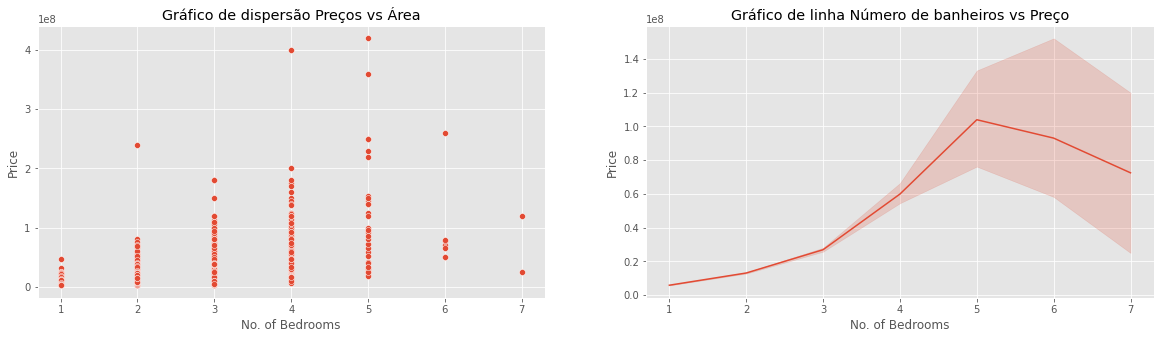

In [25]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('Gráfico de dispersão Preços vs Área')
ax[1].title.set_text('Gráfico de linha Número de banheiros vs Preço')
sns.scatterplot(x='No. of Bedrooms',y='Price',data=casas, ax=ax[0])
sns.lineplot(x='No. of Bedrooms',y='Price',data=casas, ax=ax[1]);

Também podemos usar o gráfico de barras para visualizar o comportamento entre essas variáveis.

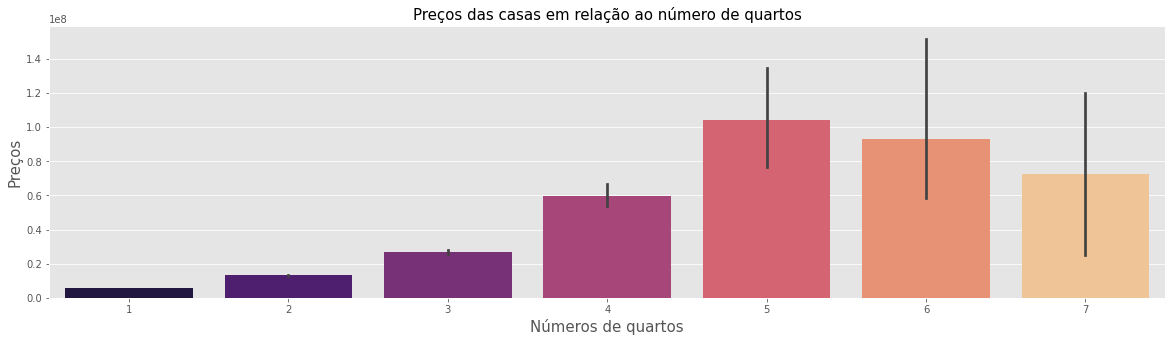

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(x='No. of Bedrooms',y='Price', data=casas, palette='magma')
plt.title("Preços das casas em relação ao número de quartos", size=15)
plt.xlabel('Números de quartos', size=15)
plt.ylabel("Preços",size=15);

### Gráfico de Pareto

O gráfico de Pareto é um gráfico de colunas que ordena as frequências das ocorrências, da maior para a menor, permitindo a priorização dos problemas, procurando levar a cabo o princípio de Pareto, isto é, há muitos problemas sem importância diante de outros mais graves.

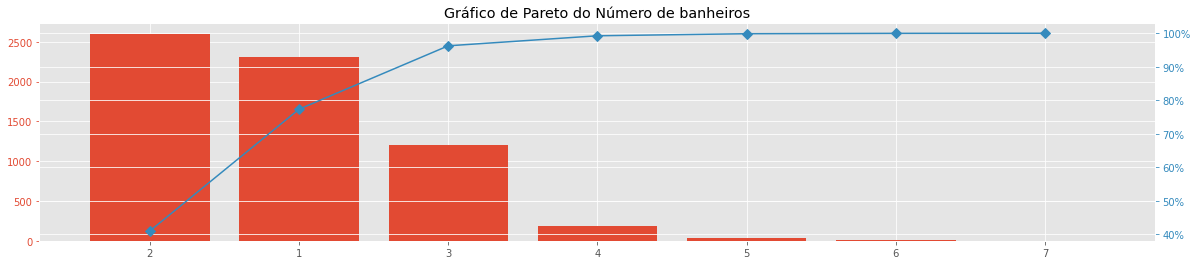

In [31]:
df = pd.DataFrame({'Número de banheiros': [casas['No. of Bedrooms'].value_counts()[2],
                               casas['No. of Bedrooms'].value_counts()[1],
                               casas['No. of Bedrooms'].value_counts()[3],
                               casas['No. of Bedrooms'].value_counts()[4],
                               casas['No. of Bedrooms'].value_counts()[5],
                               casas['No. of Bedrooms'].value_counts()[6],
                               casas['No. of Bedrooms'].value_counts()[7]]})
df.index = ['2', '1', '3', '4', '5', '6', '7']
df = df.sort_values(by='Número de banheiros',ascending=False)
df["cumpercentage"] = df["Número de banheiros"].cumsum()/df["Número de banheiros"].sum()*100

fig, ax = plt.subplots(figsize=(20,4))
ax.bar(df.index, df["Número de banheiros"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.title.set_text('Gráfico de Pareto do Número de banheiros')
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show();

### Gráficos de barras

Nesse primeiro conjunto de gráficos constam as contagens de cada característica que uma casa possui ou não. Vemos que a maioria das casas não possuem as características listadas.

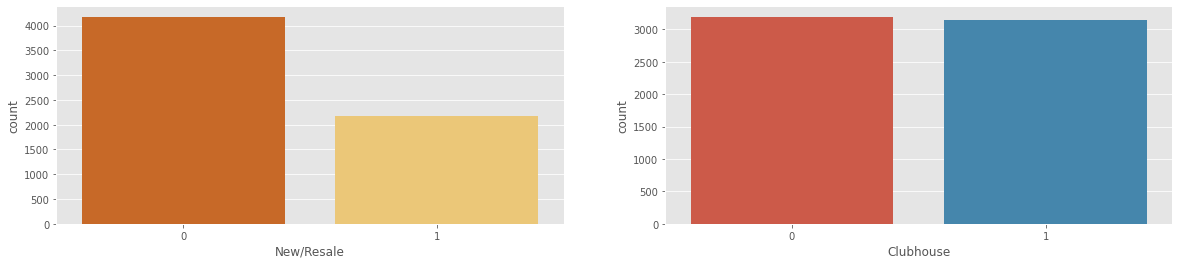

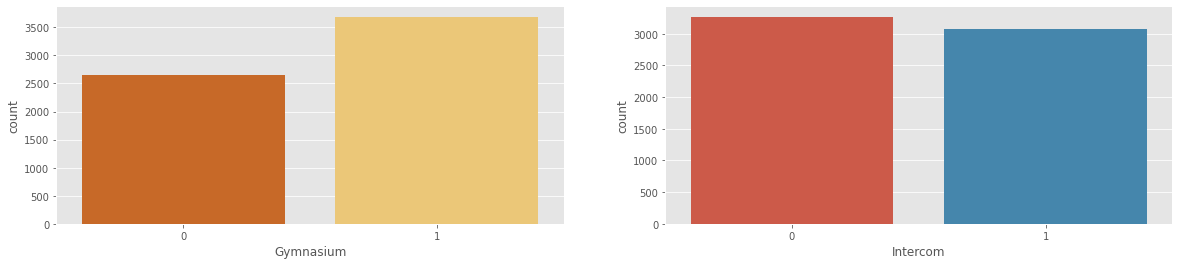

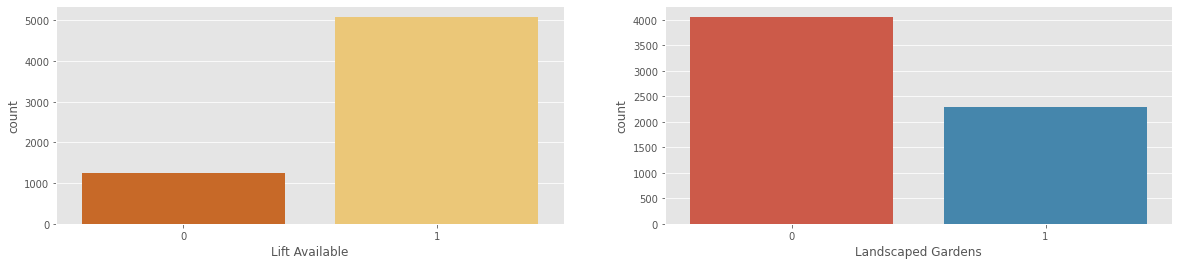

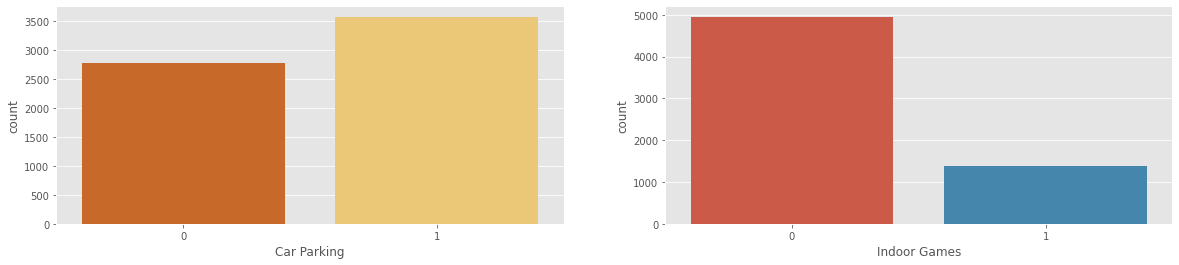

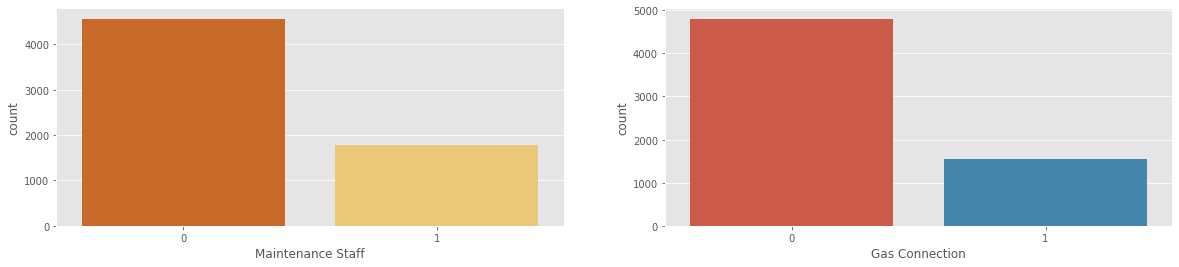

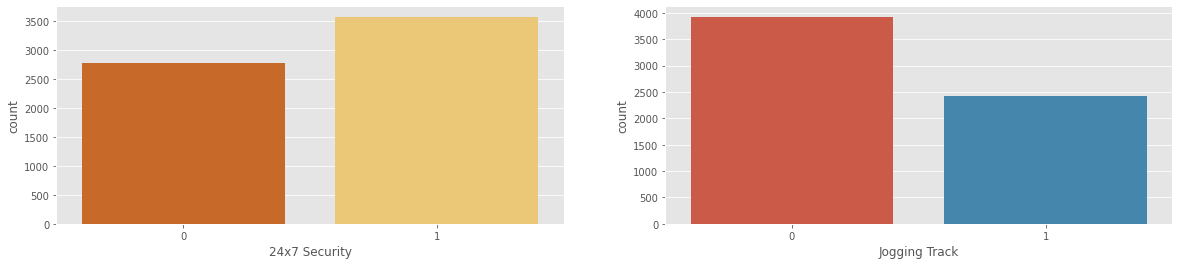

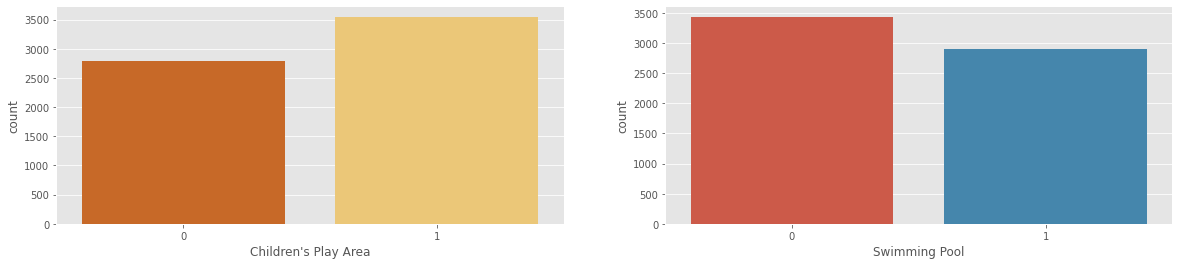

In [32]:
lista=['New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking','Maintenance Staff', '24x7 Security', "Children's Play Area"]
lista2=['Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games','Gas Connection', 'Jogging Track', 'Swimming Pool']

for i,j in zip(lista,lista2):
  fig, axarr = plt.subplots(1, 2, figsize=(20,4))
  sns.countplot(x=i, data=casas, ax=axarr[0], palette='YlOrBr_r')
  sns.countplot(x=j, data=casas, ax=axarr[1])
  #print(''*254)
  #print('Variável :',i)
  #casas[i].value_counts().plot.bar()
  plt.show()

Nos gráficos de barras abaixo podemos ver a média de preços de casas com relação se a casa possui ou não determinada características e constatamos que as casas que possuem características listadas possuem preços médios maiores do que as casas que não possuem.

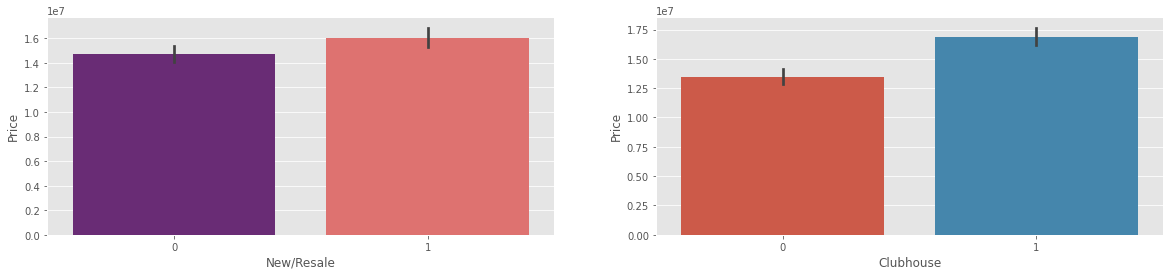

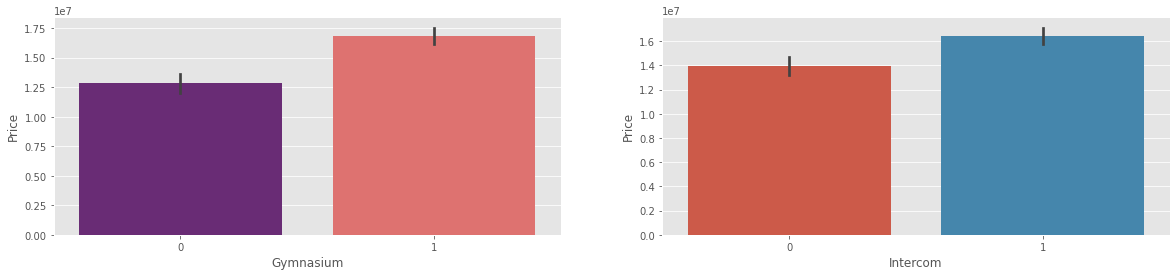

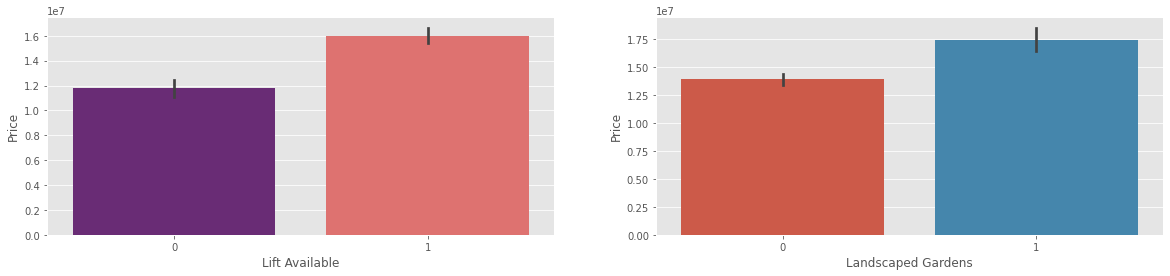

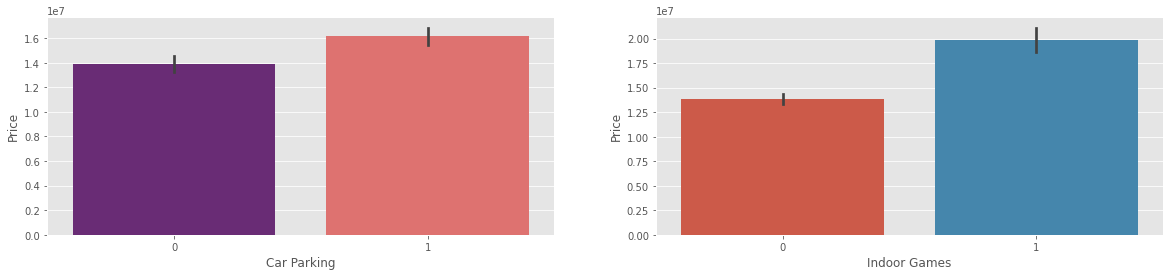

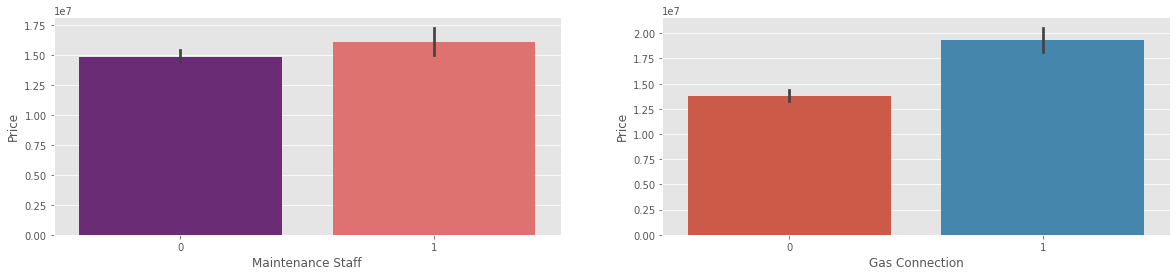

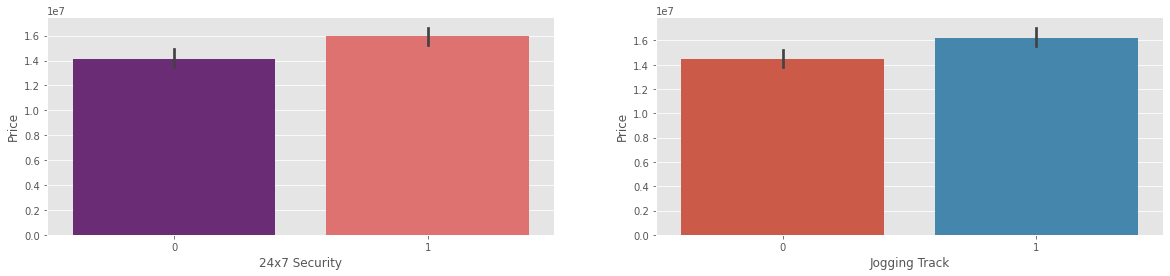

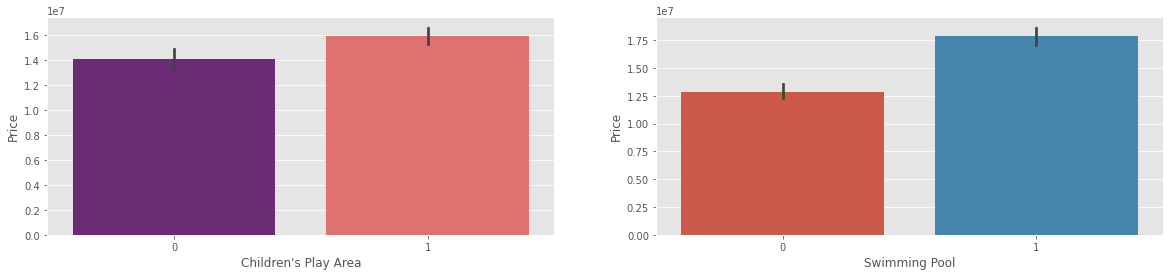

In [33]:
for i,j in zip(lista,lista2):
  fig, axarr = plt.subplots(1, 2, figsize=(20,4))
  sns.barplot(x=i,y='Price', data=casas, ax=axarr[0], palette='magma')
  sns.barplot(x=j,y='Price', data=casas, ax=axarr[1])
  #print(''*254)
  #print('Variável :',i)
  #casas[i].value_counts().plot.bar()
  plt.show()

## Medidas-Resumo

### Medidas de posição

Bussab (2010) dá as seguintes definições das medidas de posição :

A **moda** é definida como a realização mais freqüente do conjunto de valores observados. A **mediana** é a realização que ocupa a posição central da série de observações, quando estão ordenadas em ordem crescente. A **média aritmética**, conceito familiar ao leitor, é a soma das observações dividida pelo número delas.

Existe ainda a **média aparada** que é uma média realizada sem os valores extremos dos dados, onde uma porção desses extremos podem ser eliminados do cálculo.

In [23]:
print('MEDIDAS DE POSIÇÃO')
print(''*254)
print('Média dos preços das casas :',casas['Price'].mean())
print('Média 10% aparada dos preços de casas :',trim_mean(casas['Price'], 0.1))
print('Média 20% aparada dos preços de casas :',trim_mean(casas['Price'], 0.2))
print('Média 30% aparada dos preços de casas :',trim_mean(casas['Price'], 0.3))
print('Média 40% aparada dos preços de casas :',trim_mean(casas['Price'], 0.4))
print('Mediana dos preços das casas :',casas['Price'].median())
print('Moda dos preços das casas :',casas['Price'].mode()[0])

MEDIDAS DE POSIÇÃO

Média dos preços das casas : 15154013.68725382
Média 10% aparada dos preços de casas : 11413664.871825162
Média 20% aparada dos preços de casas : 10477083.98923602
Média 30% aparada dos preços de casas : 9992966.100433242
Média 40% aparada dos preços de casas : 9622229.718332022
Mediana dos preços das casas : 9500000.0
Moda dos preços das casas : 8500000


### Medidas de dispersão

As medidas de dispersão mostram o quanto os dados estão distantes um dos outros e as principais medidas de dispersão são a variância, o desvio padrão, quantis (ou percentis), Intervalo interquartil, valor máximo, valor mínimo e Amplitude.

In [22]:
print('MEDIDAS DE DISPERSÃO')
print(''*254)
print('Variância dos preços das casas :',casas['Price'].var())
print('Desvio padrão dos preços das casas :',casas['Price'].std())
print('Quantil 0.25 :',casas['Price'].quantile(0.25))
print('Quantil 0.5 (Mediana) :',casas['Price'].quantile(0.5))
print('Quantil 0.75 :',casas['Price'].quantile(0.75))
print('Quantil 0.99 :',casas['Price'].quantile(0.99))
print('Intervalo Interquartil :',iqr(casas['Price']))
print('Máximo dos preços das casas :',casas['Price'].max())
print('Mínimo dos preços das casas :',casas['Price'].min())
print('Amplitude :',casas['Price'].max()-casas['Price'].min())
print('Coeficiente de variação :',(casas['Price'].std()/casas['Price'].mean())*100)

MEDIDAS DE DISPERSÃO

Variância dos preços das casas : 406402470359149.56
Desvio padrão dos preços das casas : 20159426.340031344
Quantil 0.25 : 5300000.0
Quantil 0.5 (Mediana) : 9500000.0
Quantil 0.75 : 17500000.0
Quantil 0.99 : 95054000.0
Intervalo Interquartil : 12200000.0
Máximo dos preços das casas : 420000000
Mínimo dos preços das casas : 2000000
Amplitude : 418000000
Coeficiente de variação : 133.03027670476254


### Medidas de assimetria

In [24]:
print('MEDIDAS DE ASSIMETRIA')
print(''*254)
print('Curtose dos preços de casas :',casas['Price'].kurtosis())
print('Assimetria dos preços de casas :',skew(casas['Price']))
print('Coeficiente de Pearson entre Preço e Área :',np.corrcoef(casas['Price'], casas['Area'])[0][1])


MEDIDAS DE ASSIMETRIA

Curtose dos preços de casas : 85.18853615580598
Assimetria dos preços de casas : 6.821978254927152
Coeficiente de Pearson entre Preço e Área : 0.7223358040503133


Abaixo podemos ver o coeficiente de *Pearson* das variáveis com os preços das casas. As variáveis com maiores coeficientes são *Area* e *No. of Bedrooms*.

In [ ]:
casas.corr()['Price']*100

Unnamed: 0               -7.473282
Price                   100.000000
Area                     72.233580
No. of Bedrooms          59.486512
New/Resale                3.242828
Gymnasium                 9.809710
Lift Available            8.365596
Car Parking               5.522109
Maintenance Staff         2.760391
24x7 Security             4.510702
Children's Play Area      4.512632
Clubhouse                 8.477513
Intercom                  6.306049
Landscaped Gardens        8.222495
Indoor Games             12.235217
Gas Connection           11.824528
Jogging Track             4.232489
Swimming Pool            12.390190
Name: Price, dtype: float64

Abaixo podemos ver o coeficiente de *Spearman* das variáveis com o preço das casas. A diferença entre essa coeficiente e o anterior, é que o de *Spearman* identifica relação não lineares entre as variáveis. 

Vemos que os valores são diferentes do resultado anterior, com uma queda no valor da variável *Area* e um aumento do resultado da variável *No. of Bedrooms*.

In [34]:
casas.corr('spearman')['Price']*100

Unnamed: 0               -7.529789
Price                   100.000000
Area                     70.253462
No. of Bedrooms          71.945071
New/Resale                4.971201
Gymnasium                20.090337
Lift Available            9.689236
Car Parking               8.136835
Maintenance Staff         3.279639
24x7 Security             7.344560
Children's Play Area      6.695208
Clubhouse                16.351969
Intercom                 14.896339
Landscaped Gardens        6.382045
Indoor Games             15.261682
Gas Connection           20.321489
Jogging Track             8.760959
Swimming Pool            22.300635
Name: Price, dtype: float64